In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



Bad key "text.kerning_factor" on line 4 in
/Users/michaelliu/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
names =["Rank", "Location", "Tuition", "Major", "Salary"]
# TODO 
# dftrain = pd.read_csv(...)
df = pd.read_csv('usuable_data_student_success.csv',
                 names=names,na_values='?')
df

,Rank,Location,Tuition,Major,Salary
0,99,AL,28840,Management,41400
1,99,AL,28840,Business,41400
2,99,AL,28840,Architecture,48800
3,99,AL,28840,Communication,34800
4,99,AL,28840,Med,34800
...,...,...,...,...,...
3565,5,CA,47940,Language,24200
3566,5,CA,47940,Bio,35900
3567,5,CA,47940,Bio,36200
3568,5,CA,47940,Psychology,41300


In [3]:
cat_columns = ["Location", "Major"]
df_processed = pd.get_dummies(df, prefix_sep="__",
                              columns=cat_columns)
df_processed["Rank"]*=-1
label_encoders = {}
for col in cat_columns:
    print("Encoding {}".format(col))
    new_le = LabelEncoder()
    df_processed[col] = new_le.fit_transform(df[col])
    label_encoders[col] = new_le
    
df_processed = df_processed.drop(columns="Location")
df_processed = df_processed.drop(columns="Major")


df_processed.head(10)


Encoding Location
Encoding Major


,Rank,Tuition,Salary,Location__AL,Location__AR,Location__AZ,Location__CA,Location__CO,Location__CT,Location__DC,...,Major__Med,Major__Music,Major__Nursing,Major__Petroleum,Major__Philosophy,Major__Physics,Major__Politic,Major__Psychology,Major__Social,Major__Sociology
0,-99,28840,41400,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-99,28840,41400,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-99,28840,48800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-99,28840,34800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-99,28840,34800,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,-99,28840,35200,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,-99,28840,34800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-99,28840,52800,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-99,28840,60000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-99,28840,73100,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#split into test and train
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_processed, test_size=0.2)
train.shape

(2856, 90)

In [28]:
#set up a simple baseline by using median salary as prediction 
ytrain = np.array(train['Salary'])
median_salary = np.median(ytrain)
ytrain_pred_loss_arr = np.absolute(ytrain - median_salary)
baseline_train_loss = np.sum(np.abs(ytrain_pred_loss_arr))/len(ytrain)
print("basline train loss using median="+"{:.2e}".format(baseline_train_loss))

mean_salary = np.mean(ytrain)
ytrain_pred_loss_arr = np.absolute(ytrain - mean_salary)
baseline_train_loss = np.sum(np.abs(ytrain_pred_loss_arr))/len(ytrain)
print("basline train loss using mean="+"{:.2e}".format(baseline_train_loss))

#get beaseline test loss median
ytest = np.array(test['Salary'])
median_salary = np.median(ytest)
ytest_pred_loss_arr = np.absolute(ytest - median_salary)
baseline_test_loss = np.sum(np.abs(ytest_pred_loss_arr))/len(ytest)
print("basline test loss using median="+"{:.2e}".format(baseline_test_loss))

#get beaseline test loss mean
ytest = np.array(test['Salary'])
mean_salary = np.mean(ytest)
ytest_pred_loss_arr = np.absolute(ytest - mean_salary)
baseline_test_loss = np.sum(np.abs(ytest_pred_loss_arr))/len(ytest)
print("basline test loss using mean="+"{:.2e}".format(baseline_test_loss))

basline train loss using median=1.33e+04
basline train loss using mean=1.36e+04
basline test loss using median=1.26e+04
basline test loss using mean=1.28e+04


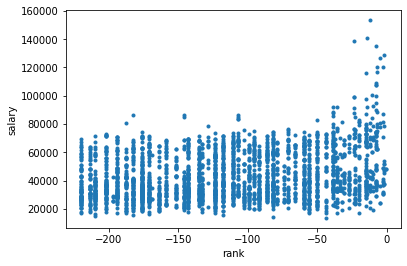

In [6]:
ytrain = np.array(train['Salary'])
rank = np.array(train['Rank'])
plt.xlabel('rank')
plt.ylabel('salary')
plt.plot(rank,ytrain,'.')


In [31]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(train[['Rank']], ytrain)
y_pred = regressor.predict(test[["Rank"]])
univariableAnalysisLoss = np.sum(np.abs(y_pred-ytest))/len(y_pred)
print("Average Loss from prediction using only rank: ", univariableAnalysisLoss)

Average Loss from prediction using only rank:  12555.220619755994


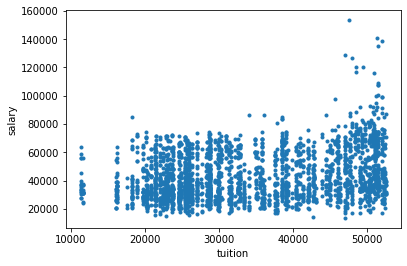

In [8]:
tuition = np.array(train['Tuition'])
plt.xlabel('tuition')
plt.ylabel('salary')
plt.plot(tuition,ytrain,'.')

In [30]:
regressor = linear_model.LinearRegression()
regressor.fit(train[['Tuition']], ytrain)
y_pred = regressor.predict(test[["Tuition"]])
univariableAnalysisLoss = np.sum(np.abs(y_pred-ytest))/len(y_pred)
print("Average Loss from prediction using only tuition: ", univariableAnalysisLoss)

Average Loss from prediction using only tuition:  12496.003309746682


In [9]:
#find xtrain
predCol = []
for col in train.columns:
    if col!="Salary":
        predCol.append(col)
xtrain = train[predCol]
xtest = test[predCol]
ytest = test["Salary"]

In [10]:
regr = linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
regr.coef_

array([ 6.61623876e+01,  9.66830275e-02, -2.80315021e+03,  1.06631619e+03,
       -1.11660710e+03, -2.24398511e+03,  1.01524556e+02, -1.48870471e+03,
        8.63757889e+02, -6.67802026e+02, -5.11338540e+03, -7.36445838e+03,
       -7.08608888e+02, -1.13759502e+03,  4.59250603e+02, -2.31514455e+02,
        1.75710110e+01, -7.71926351e+02, -1.74618685e+02,  1.80915318e+03,
        7.25486225e+03, -2.88000684e+03,  1.79503480e+03, -5.28873661e+03,
       -1.23074443e+03,  1.72481619e+03,  1.41272366e+03,  7.81914844e+03,
        9.63268251e+03,  1.68404112e+03, -5.57387789e+02, -3.92431369e+02,
       -4.19427497e+03, -3.99479467e+03,  3.03808564e+03,  4.60049647e+03,
       -2.96710419e+03,  3.01011659e+03,  2.08509230e+03,  9.13433242e+01,
        3.64978248e+03,  4.38691350e+02, -7.04993351e+03,  6.47447770e+02,
       -7.29147684e+01,  3.11726282e+02, -1.06297912e+03,  8.43859077e+03,
        2.01199014e+04, -1.88602675e+04, -6.96476177e+02, -1.57915786e+04,
       -1.33447347e+04,  

In [12]:
regr.intercept_

49549.920601065125

In [13]:
ytrain_pred = regr.predict(xtrain)
lossm = np.sum(np.abs(ytrain_pred - ytrain))

print("multiple variable average loss="+"{:.2e}".format(lossm/len(ytrain)))

multiple variable average loss=6.68e+03


In [14]:
ytest_pred = regr.predict(xtest)
lossm = np.sum(np.abs(ytest_pred - ytest))

print("multiple variable average loss="+"{:.2e}".format(lossm/len(ytest)))

multiple variable average loss=7.19e+03


In [15]:
import math
y = np.array(df_processed['Salary'])
x = df_processed[predCol]
ysal = pd.Series(y)
strongestCorr, column = 0, ""
locationCorrCount, locationS, majorS, majorCorrCount = 0,0,0,0
rankCorr, tuitionCorr = None, None
listOfCorr = []
for col in predCol:
    predV = x[col]
    corr = predV.corr(ysal)
    if not math.isnan(corr):
        listOfCorr.append((col, corr))
        if "Location" in col:
            locationS+=abs(corr)
            locationCorrCount+=1
        if "Major" in col:
            majorS+=abs(corr)
            majorCorrCount+=1
        if "Rank" in col:
            rankCorr = corr
        if "Tuition" in col:
            tuitionCorr = corr
    if abs(corr)>abs(strongestCorr):
        strongestCorr = corr
        column = col
    print("Correlation between ",col," and Salary is ", corr)


Correlation between  Rank  and Salary is  0.27516991288998127
Correlation between  Tuition  and Salary is  0.27379003470916397
Correlation between  Location__AL  and Salary is  -0.005556989143202543
Correlation between  Location__AR  and Salary is  -0.006883049776992106
Correlation between  Location__AZ  and Salary is  -0.022714052716141454
Correlation between  Location__CA  and Salary is  -0.01410136310861972
Correlation between  Location__CO  and Salary is  0.03025272632111027
Correlation between  Location__CT  and Salary is  -0.004005758257188353
Correlation between  Location__DC  and Salary is  0.020790468317971388
Correlation between  Location__DE  and Salary is  0.016667545796695587
Correlation between  Location__FL  and Salary is  -0.06901194638999004
Correlation between  Location__GA  and Salary is  -0.04915066901017824
Correlation between  Location__IA  and Salary is  -0.0005539363149166209
Correlation between  Location__ID  and Salary is  -0.027744337123540394
Correlation bet

In [16]:
print("The strongest indicator with the highest correlation is ", column,", with a correlation coefficient of ", strongestCorr)

The strongest indicator with the highest correlation is  Major__Computer Science , with a correlation coefficient of  0.27750605575247667


In [17]:
print("Correlation coefficients: (Average of absolute value for each major and location)")
print("Rank: ", rankCorr)
print("Tuition: ", tuitionCorr)
print("Major Average: ", majorS/majorCorrCount)
print("Location Average: ", locationS/locationCorrCount)

Correlation coefficients: (Average of absolute value for each major and location)
Rank:  0.27516991288998127
Tuition:  0.27379003470916397
Major Average:  0.09794138646649324
Location Average:  0.027263949812578698


In [18]:
listOfCorr.sort(key=lambda x:x[1], reverse = True)
print("The 20 strongest positive correlation variables: ")
for i in range(20):
    print(listOfCorr[i])

The 20 strongest positive correlation variables: 
('Major__Computer Science', 0.27750605575247667)
('Rank', 0.27516991288998127)
('Tuition', 0.27379003470916397)
('Major__Electrical', 0.21041802256897066)
('Major__Mechanical', 0.20158330446918055)
('Major__Information', 0.1993688291503737)
('Major__Nursing', 0.18949459123925194)
('Major__Computer Engineer', 0.15359268928644704)
('Location__PA', 0.1290309895297291)
('Major__Civil', 0.12817229862823157)
('Major__Industrial', 0.1019892293395976)
('Major__Chem', 0.09332481849073107)
('Major__Finance', 0.09161343334551993)
('Location__MA', 0.09024913459482714)
('Major__Accounting', 0.08570107750355382)
('Major__Aerospace', 0.08031775457003525)
('Major__Management', 0.08017123459009073)
('Major__Biomedical', 0.07743168466727679)
('Major__Economics', 0.07538763449112489)
('Major__Math', 0.06781922280322908)


In [19]:
print("The 20 strongest negative correlation variables: ")
for i in range(20):
    print(listOfCorr[len(listOfCorr)-1-i])

The 20 strongest negative correlation variables: 
('Major__Art', -0.24868254624353117)
('Major__Language', -0.16604624441967622)
('Major__Bio', -0.1570856324783877)
('Major__Psychology', -0.1508678179197493)
('Major__English', -0.13132900574731995)
('Major__Anthropology', -0.1070513265734893)
('Major__Health', -0.1020680120084168)
('Major__Sociology', -0.10175567517802471)
('Major__Music', -0.0969468147193498)
('Major__History', -0.09347074669013604)
('Major__Social', -0.08424434662822672)
('Major__Journalism', -0.07858061086859504)
('Location__OR', -0.07574970734294881)
('Location__FL', -0.06901194638999004)
('Major__Politic', -0.06556126273897572)
('Major__Government', -0.06556126273897572)
('Major__Criminal', -0.06214420878216978)
('Location__VA', -0.04959628931964158)
('Location__GA', -0.04915066901017824)
('Location__MS', -0.048814250193346266)
